In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv('datasets/diamonds.csv', index_col=0)
data.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
data.shape

(53940, 10)

In [8]:
data = data.sample(frac=0.2)
data.shape

(10788, 10)

In [9]:
data.reset_index(inplace=True, drop=True)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.55,Premium,G,VS2,62.3,56.0,1668,5.29,5.24,3.28
1,0.40,Ideal,G,VS2,60.9,58.0,825,4.76,4.79,2.91
2,0.53,Ideal,E,VVS2,62.9,54.0,2271,5.19,5.15,3.25
3,1.01,Premium,G,VS1,62.6,59.0,6499,6.38,6.46,4.02
4,0.50,Very Good,D,SI2,58.9,60.0,1123,5.20,5.23,3.07


In [10]:
correlation = data.corr()
correlation

,carat,depth,table,price,x,y,z
carat,1.000000,0.027193,0.184807,0.923725,0.976575,0.975273,0.970335
depth,0.027193,1.000000,-0.286010,-0.015735,-0.024270,-0.028411,0.096032
table,0.184807,-0.286010,1.000000,0.131143,0.199404,0.193121,0.163545
price,0.923725,-0.015735,0.131143,1.000000,0.889064,0.890305,0.878456
x,0.976575,-0.024270,0.199404,0.889064,1.000000,0.998424,0.986717
y,0.975273,-0.028411,0.193121,0.890305,0.998424,1.000000,0.986067
z,0.970335,0.096032,0.163545,0.878456,0.986717,0.986067,1.000000


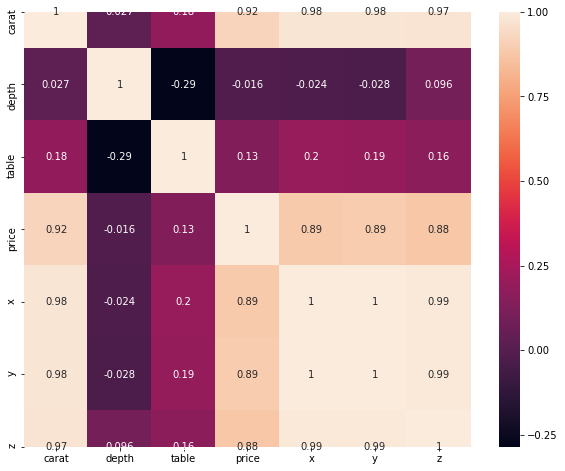

In [14]:
plt.subplots(figsize=(10,8))

sns.heatmap(correlation, annot=True)
plt.show()

In [15]:
data['cut'].unique()

array(['Premium', 'Ideal', 'Very Good', 'Good', 'Fair'], dtype=object)

In [16]:
data['color'].unique()

array(['G', 'E', 'D', 'I', 'J', 'F', 'H'], dtype=object)

In [17]:
data['clarity'].unique()

array(['VS2', 'VVS2', 'VS1', 'SI2', 'SI1', 'VVS1', 'IF', 'I1'],
      dtype=object)

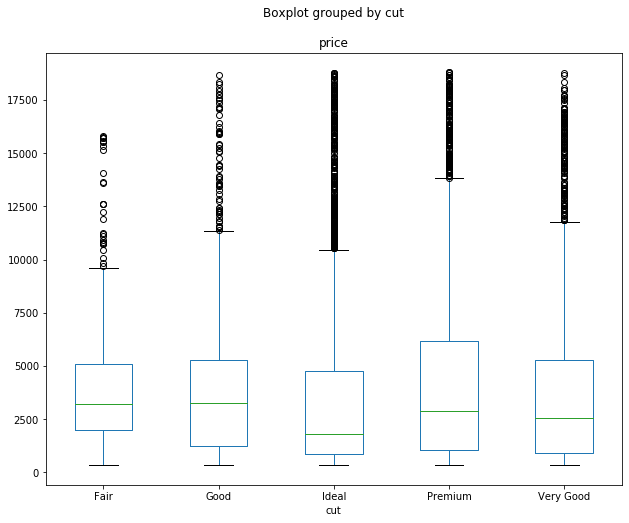

In [18]:
data.boxplot(by='cut', column=['price'], grid=False, figsize=(10,8))

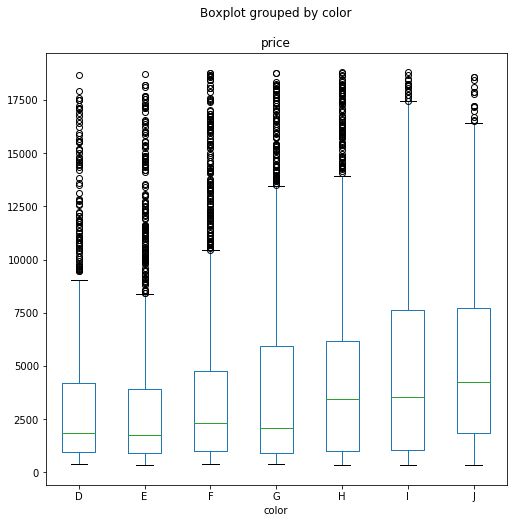

In [20]:
data.boxplot(by='color', column=['price'], grid=False, figsize=(8,8))

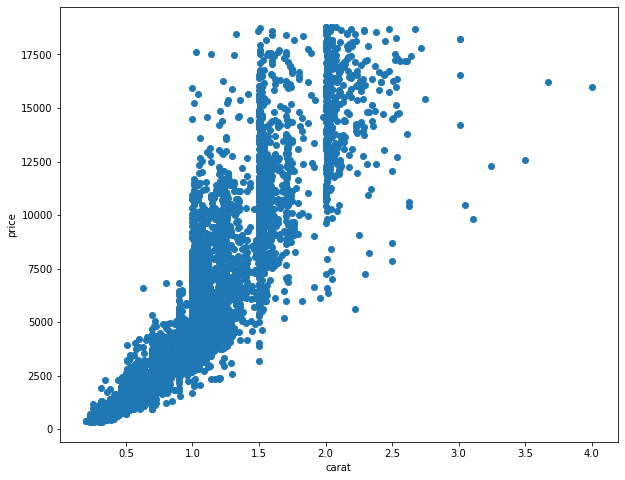

In [21]:
plt.subplots(figsize=(10,8))

plt.scatter(data['carat'], data['price'])
plt.xlabel('carat')
plt.ylabel('price')
plt.show()

In [23]:
clarity_dict = {"IF" : 7, "VVS1" : 6, "VVS2" : 5, "VS1" : 4, "VS2" : 3, "SI1" : 2, "SI2" : 1, "I1" : 0}
data['clarity'].replace(clarity_dict, inplace=True)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.55,Premium,G,3,62.3,56.0,1668,5.29,5.24,3.28
1,0.40,Ideal,G,3,60.9,58.0,825,4.76,4.79,2.91
2,0.53,Ideal,E,5,62.9,54.0,2271,5.19,5.15,3.25
3,1.01,Premium,G,4,62.6,59.0,6499,6.38,6.46,4.02
4,0.50,Very Good,D,1,58.9,60.0,1123,5.20,5.23,3.07


In [25]:
data.clarity.isnull().sum()

0

In [26]:
data = pd.get_dummies(data, columns=['cut', 'color'])
data.head()

,carat,clarity,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.55,3,62.3,56.0,1668,5.29,5.24,3.28,0,0,0,1,0,0,0,0,1,0,0,0
1,0.40,3,60.9,58.0,825,4.76,4.79,2.91,0,0,1,0,0,0,0,0,1,0,0,0
2,0.53,5,62.9,54.0,2271,5.19,5.15,3.25,0,0,1,0,0,0,1,0,0,0,0,0
3,1.01,4,62.6,59.0,6499,6.38,6.46,4.02,0,0,0,1,0,0,0,0,1,0,0,0
4,0.50,1,58.9,60.0,1123,5.20,5.23,3.07,0,0,0,0,1,1,0,0,0,0,0,0


In [27]:
data.shape

(10788, 20)

In [28]:
numeric_features = ['carat', 'depth', 'table', 'x', 'y', 'z']

numeric_df = data[numeric_features]
numeric_df.describe()

,carat,depth,table,x,y,z
count,10788.000000,10788.000000,10788.000000,10788.000000,10788.000000,10788.000000
mean,0.796341,61.765295,57.449147,5.726364,5.728030,3.536283
std,0.475869,1.406550,2.226651,1.119699,1.112343,0.693623
min,0.200000,53.000000,49.000000,0.000000,0.000000,0.000000
25%,0.400000,61.100000,56.000000,4.720000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,5.690000,5.690000,3.520000
75%,1.040000,62.500000,59.000000,6.540000,6.530000,4.030000
max,4.000000,72.900000,76.000000,10.010000,9.940000,6.310000


In [29]:
from sklearn.preprocessing import scale

numeric_array = scale(numeric_df)
numeric_array[:5]

array([[-0.5176905 ,  0.38017144, -0.65084942, -0.3897339 , -0.438761  ,
        -0.36950146],
       [-0.83291809, -0.61521815,  0.24740221, -0.86309729, -0.84333112,
        -0.90295701],
       [-0.55972085,  0.80676698, -1.54910106, -0.47904775, -0.51967502,
        -0.41275461],
       [ 0.44900743,  0.59346921,  0.69652803,  0.58378703,  0.65807357,
         0.69740965],
       [-0.62276636, -2.03720327,  1.14565385, -0.47011637, -0.44775144,
        -0.67227353]])

In [31]:
numeric_df = pd.DataFrame(numeric_array, columns=numeric_df.columns)
numeric_df.describe()

,carat,depth,table,x,y,z
count,1.078800e+04,1.078800e+04,1.078800e+04,1.078800e+04,1.078800e+04,1.078800e+04
mean,1.022027e-16,1.366270e-16,3.040653e-15,5.048695e-16,-7.892381e-17,8.801101e-17
std,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00
min,-1.253222e+00,-6.232059e+00,-3.794730e+00,-5.114436e+00,-5.149755e+00,-5.098513e+00
25%,-8.329181e-01,-4.730196e-01,-6.508494e-01,-8.988228e-01,-9.062643e-01,-9.029570e-01
50%,-2.024629e-01,2.467516e-02,-2.017236e-01,-3.247852e-02,-3.419087e-02,-2.347624e-02
75%,5.120529e-01,5.223700e-01,6.965280e-01,7.266892e-01,7.210067e-01,7.118274e-01
max,6.732544e+00,7.916693e+00,8.331667e+00,3.825880e+00,3.786749e+00,3.999067e+00


In [32]:
data.head()

,carat,clarity,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.55,3,62.3,56.0,1668,5.29,5.24,3.28,0,0,0,1,0,0,0,0,1,0,0,0
1,0.40,3,60.9,58.0,825,4.76,4.79,2.91,0,0,1,0,0,0,0,0,1,0,0,0
2,0.53,5,62.9,54.0,2271,5.19,5.15,3.25,0,0,1,0,0,0,1,0,0,0,0,0
3,1.01,4,62.6,59.0,6499,6.38,6.46,4.02,0,0,0,1,0,0,0,0,1,0,0,0
4,0.50,1,58.9,60.0,1123,5.20,5.23,3.07,0,0,0,0,1,1,0,0,0,0,0,0


In [33]:
data.drop(numeric_features, inplace=True, axis=1)
data.head()

,clarity,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,3,1668,0,0,0,1,0,0,0,0,1,0,0,0
1,3,825,0,0,1,0,0,0,0,0,1,0,0,0
2,5,2271,0,0,1,0,0,0,1,0,0,0,0,0
3,4,6499,0,0,0,1,0,0,0,0,1,0,0,0
4,1,1123,0,0,0,0,1,1,0,0,0,0,0,0


In [34]:
data = pd.concat([data, numeric_df], axis=1)
data.head()

,clarity,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,carat,depth,table,x,y,z
0,3,1668,0,0,0,1,0,0,0,0,1,0,0,0,-0.517691,0.380171,-0.650849,-0.389734,-0.438761,-0.369501
1,3,825,0,0,1,0,0,0,0,0,1,0,0,0,-0.832918,-0.615218,0.247402,-0.863097,-0.843331,-0.902957
2,5,2271,0,0,1,0,0,0,1,0,0,0,0,0,-0.559721,0.806767,-1.549101,-0.479048,-0.519675,-0.412755
3,4,6499,0,0,0,1,0,0,0,0,1,0,0,0,0.449007,0.593469,0.696528,0.583787,0.658074,0.697410
4,1,1123,0,0,0,0,1,1,0,0,0,0,0,0,-0.622766,-2.037203,1.145654,-0.470116,-0.447751,-0.672274


In [35]:
data.shape

(10788, 20)

In [36]:
data.to_csv('datasets/diamonds_processed.csv', index=False)

In [38]:
from sklearn.model_selection import train_test_split

X = data.drop('price', axis=1)
Y = data['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [39]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
y_pred = linear_regression.predict(x_test)
y_pred

array([ 6042.42925446,  6879.76043797, -1652.10361106, ...,
        7360.26729408,  9793.86389832,  5427.38937703])

In [42]:
train_score = linear_regression.score(x_train, y_train)
print("Training Score is : ", train_score)

Training Score is :  0.90884016741275


In [43]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print("Testing Score is : ", score)

Testing Score is :  0.9220845291219583
